In [25]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt



**SIMULATING THE TWO MOONS DATASET**

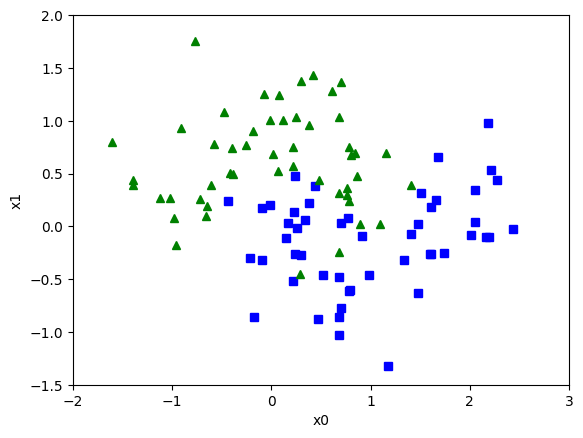

In [26]:
# 1- Generating a dataset.
from sklearn.datasets import make_moons

# X are the generated instances, an array of shape (100,2).
# y are the labels of X, with values of either 0 or 1.
X, Y = make_moons(n_samples=100, noise=0.3, random_state=14)

# 2- Visualizing the dataset.

# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "bs")
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "g^")

# X contains two features, x1 and x2
plt.xlabel("x0", fontsize=10)
plt.ylabel("x1", fontsize=10)

plt.xlim([-2, 3])
plt.ylim([-1.5, 2])

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()


**LEARNING A MODEL**

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10,min_samples_leaf = 10)

model.fit(X, Y)




DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)

Gerando uma grande quantidade de dados para verificar qual a superfície de separação definida pelo modelo aprendido

In [28]:
n = 5000
xy_min = [-2, -1.5]
xy_max = [3, 2]

data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))



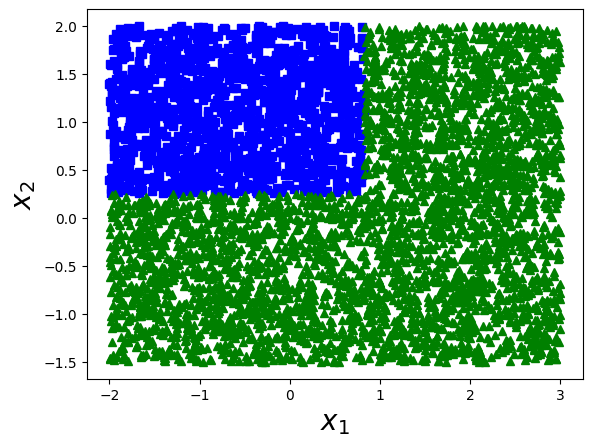

In [29]:
Yhat_new = model.predict(data)

# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat_new==0], data[:, 1][Yhat_new==0], "bs")
plt.plot(data[:, 0][Yhat_new==1], data[:, 1][Yhat_new==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

**Evaluating a model on both training and testing datasets**

In [30]:
from sklearn.metrics import accuracy_score

Yhat = model.predict(X)

accuracy_score(Y,Yhat)


0.85

In [31]:
X_test, Y_test = make_moons(n_samples=500, noise=0.3, random_state=42)

Yhat_test = model.predict(X_test)

accuracy_score(Y_test,Yhat_test)

0.798

# Aproveita esse notebook e explore os seguintes pontos:  

1. Experimente treinar árvores de decisão, variando os parâmetros de profundidade máxima e do  número mínimo de exemplos por nó terminal, com o objetivo de melhorar os resultados.

2. Experimente valores extremos para observar overfitting.

3. Experimente retreinar a árvore de decisão mas usando agora um bom conjunto de exemplos de treinamento (digamos, 1000 exemplos). É bem possível que a chance de overfitting diminua nesse caso.
 
4. Vc pode realizar experimentos usando algum outro algoritmo e verificar a fronteira de decisão que ele criam.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def evaluate_decision_tree_parameters(dataset, dtc_parameters):
    X, Y = dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42)

    for params in dtc_parameters:
        max_depth = params['max_depth']
        min_samples_leaf = params['min_samples_leaf']

        model = DecisionTreeClassifier(
            criterion='entropy',
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
        )
        model.fit(X_train, y_train)

        Yhat_train = model.predict(X_train)
        Yhat_test = model.predict(X_test)

        accuracy_train = accuracy_score(y_train, Yhat_train)
        accuracy_test = accuracy_score(y_test, Yhat_test)

        result = (f'max_depth={max_depth},'
                  f'min_samples_leaf={min_samples_leaf},'
                  f'accuracy_train={accuracy_train:.2f},'
                  f'accuracy_test={accuracy_test:.2f}')

        plt.plot(X_test[:, 0][Yhat_test==0], X_test[:, 1][Yhat_test==0], "bs")
        plt.plot(X_test[:, 0][Yhat_test==1], X_test[:, 1][Yhat_test==1], "g^")

        plt.xlabel(r"$x_1$", fontsize=20)
        plt.ylabel(r"$x_2$", fontsize=20)

        plt.xticks([])
        plt.yticks([])

        plt.title(result)

        plt.show()

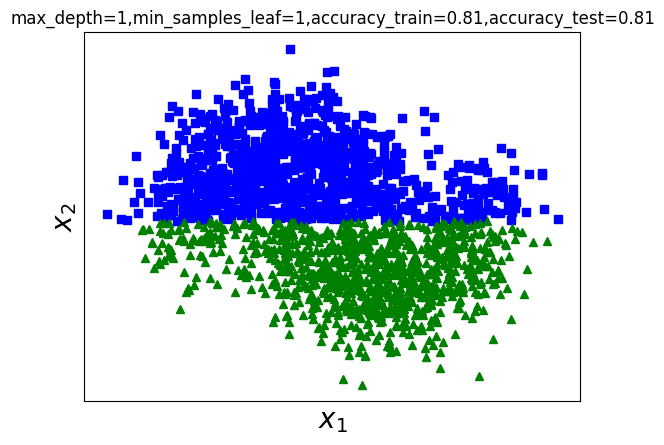

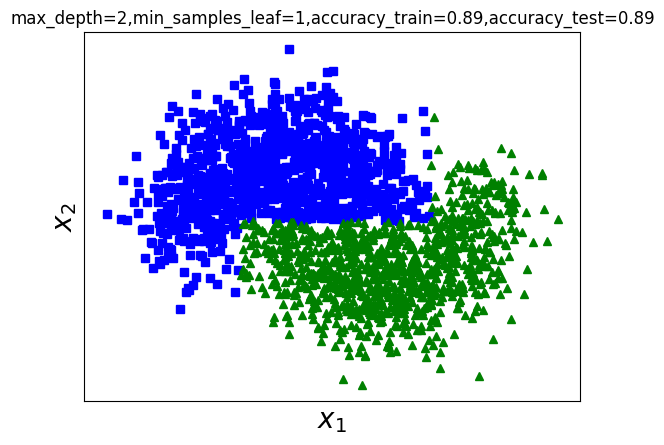

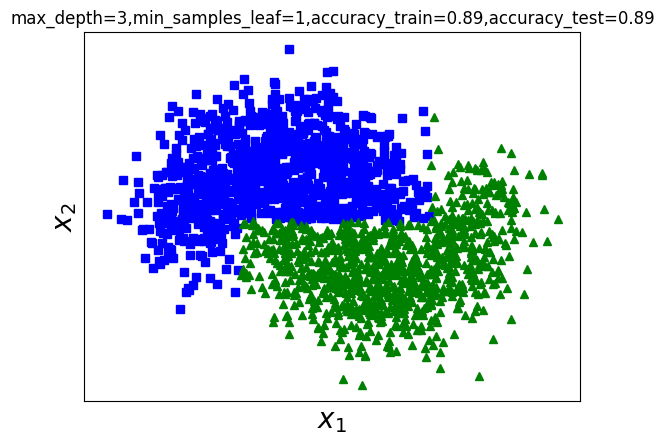

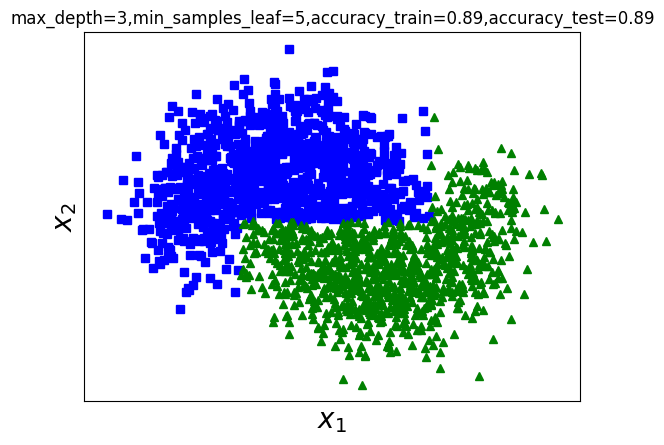

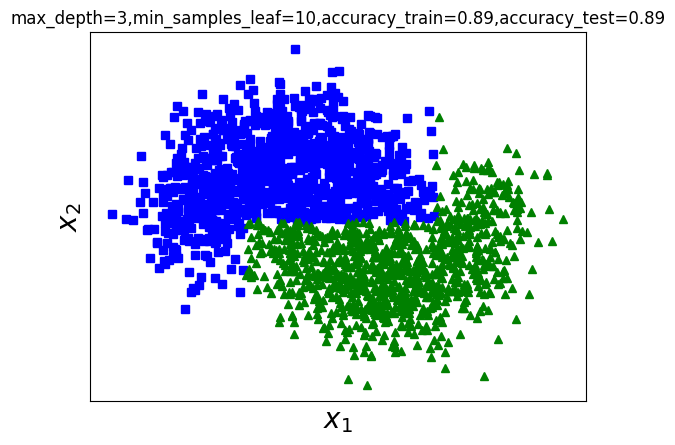

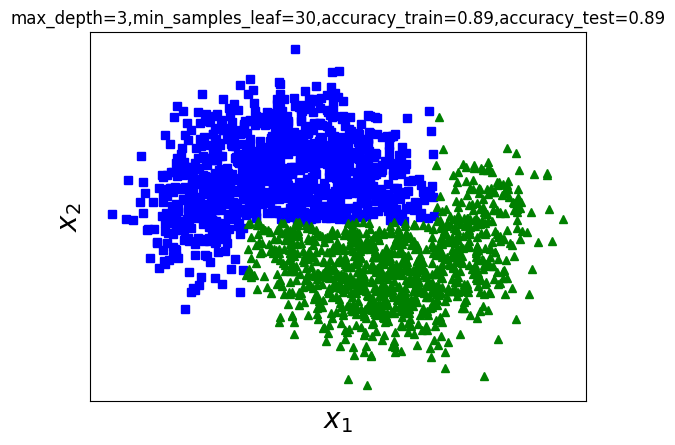

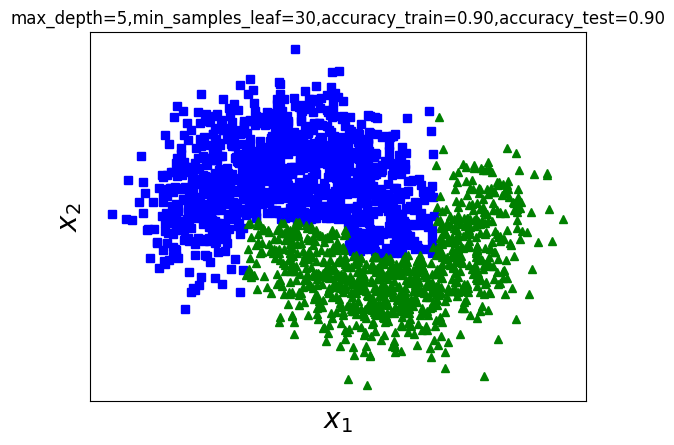

In [33]:
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=10000, noise=0.3, random_state=14)

dtc_parameters = [
    {'max_depth': 1, 'min_samples_leaf': 1},
    {'max_depth': 2, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_leaf': 5},
    {'max_depth': 3, 'min_samples_leaf': 10},
    {'max_depth': 3, 'min_samples_leaf': 30},
    {'max_depth': 5, 'min_samples_leaf': 30},
]

evaluate_decision_tree_parameters((X, Y), dtc_parameters)
